<a href="https://colab.research.google.com/github/NightPrinceY/CollegeForFun/blob/main/Shakespeare_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'shakespeare:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4433247%2F7612931%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240212%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240212T170058Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74172a125330c9493d93fe2353d693d1fc9fe7d590090acfc53f324cd18f938e0542fee741498ee2f39274b9bac7695e552a1751c5b3630bb7b7cbc13f3972a62f5132b610c648481ea074e9206001d55ba33bb3ba9661770ecd53899450145231074cebe4477f63be03b6c795450bfcb96a97a48bb659bb89f3297127f0d9e895c03968a89560db0db976668e7e8cb3383b3162f0323907d0ce4ea3de159b498c7ecca1b93d8f60276639f565b6986d948441e00370f964fa9cd858ce4260f0a83ee45e9e12adc84e534058be0747412b282fc94ae4274e56849e67bdccf315af1935ef73c735ecb3996f1af07a35316366d0a6e649f08fc54833628ca76873'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 442517 bytes downloaded
Downloaded and uncompressed: shakespeare
Data source import complete.


# Welocome - Shakespear quotes  
***this project it's was assignment for tensor-flow-s i hope you enjoy***

***it said thas if love lit you love shakespear...so let's go***

pic shakespear
![Screenshot%202024-02-12%20183935.png](attachment:Screenshot%202024-02-12%20183935.png)

In [ ]:
#import library
import numpy as np
import matplotlib.pyplot as plt  #to show and present everthing on loss, accuracy
from tensorflow.keras.models import Sequential #our model it's sequnces
from tensorflow.keras.utils import to_categorical  #for one_hot_encode multi labels
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional  #this only layers i'm gonna use in this project


2024-02-12 16:51:33.051044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 16:51:33.051139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 16:51:33.225815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
source_file = '/kaggle/input/shakespeare'   #shakespeare-text

In [ ]:
#read text-file
with open('/kaggle/input/shakespeare/shakespeare.txt' , 'r') as f:
    data = f.read()

  #preprocessing (to lower case , split into corpus)
corpus = data.lower().split("\n")

  #too big data so we just split 10000 lines
corpus = corpus[:10000]

print(f"There are {len(corpus)} lines of shakespeare\n")
print(f"The first 5 lines look like this:\n")
for i in range(2):
  print(corpus[i])

There are 10000 lines of shakespeare

The first 5 lines look like this:

first citizen:
before we proceed any further, hear me speak.


In [ ]:
#another example of the corpus[]
print(f"The 88th  line look like this:\n{corpus[88]}\n")

The 88th  line look like this:
with bats and clubs? the matter? speak, i pray you.



In [ ]:
#built a tokenizer
tokenizer = Tokenizer()

   #fit token on the corpus
tokenizer.fit_on_texts(corpus)

  #get the total_words in vocab
total_words = len(tokenizer.word_index) +1   #+1 for 'unknown' = 'OOV'
print(f"the total words in vocab  : {total_words}")

the total words in vocab  : 5725


***ok here we are let's create a sequence for token_lines***
for each line we'll make n-gram sequence for undersand what i mean:
ex = [1,2,3,4,5,6]

n_grams_ex =[
             [1,2]

             [1,2,3]
             
             [1,2,3,4]
             
             [1,2,3,4,5]
             
             [1,2,3,4,5,6] ]
             
this called n-gram              

In [ ]:
#a list to save the sequences
input_sequences = []

#forloop on all the lines in corpus
for line in corpus :

    #for each line convert to sequence
    token_list = tokenizer.texts_to_sequences([line])[0]

    #forloop on each line to creat n-gram (each line)..look above to understand
    for i in range(1,len(token_list)):

        n_gram_seqs = token_list[: i+1]
        #adding the sequence to the list
        input_sequences.append(n_gram_seqs)


In [ ]:
#get the maxlen in the sequences..needed in the next steps
max_len_seq = max([len(x) for x in input_sequences])
print(f"the max_lenght in sequences : {max_len_seq}")

the max_lenght in sequences : 13


***next step padding the data for prepare for fit..using pad_sequnece***

In [ ]:
padd_seq = pad_sequences(input_sequences , maxlen = max_len_seq, padding = 'pre')

In [ ]:
print(f"an example after paddingd:\n{padd_seq[7777]}")

an example after paddingd:
[   0    0    0    0    0    0    0    0    2   10    1 3319    6]


***next step it's spliting the data for sentences and labels :***

  ***ex  = "when i heard about it i felt like i fly like a bird"***

  ***train = when i heard about it i felt like i fly like a  #as sequnce***

  ***label = bird                                            #as one_hot_encode***

In [ ]:
features = padd_seq[: , :-1]  #the entire sequnce except the last elment

labels  = to_categorical(padd_seq[: ,-1],num_classes = total_words) #the last elment and encoded using to_categorical()

***building a model ...***

In [ ]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_len_seq-1)) #embedding as 1th layer
model.add(Bidirectional(LSTM(120)))

#softmax as output layer with units = total words generate
model.add(Dense(total_words , activation = 'softmax'))


    # Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50


I0000 00:00:1707756714.134926      98 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1264/1264 [==============================] - 24s 16ms/step - loss: 6.7993 - accuracy: 0.0403
Epoch 2/50
1264/1264 [==============================] - 10s 8ms/step - loss: 6.2336 - accuracy: 0.0609
Epoch 3/50
1264/1264 [==============================] - 10s 8ms/step - loss: 5.8331 - accuracy: 0.0871
Epoch 4/50
1264/1264 [==============================] - 9s 8ms/step - loss: 5.4894 - accuracy: 0.1045
Epoch 5/50
1264/1264 [==============================] - 9s 7ms/step - loss: 5.1500 - accuracy: 0.1152
Epoch 6/50
1264/1264 [==============================] - 10s 8ms/step - loss: 4.8025 - accuracy: 0.1318
Epoch 7/50
1264/1264 [==============================] - 9s 7ms/step - loss: 4.4534 - accuracy: 0.1567
Epoch 8/50
1264/1264 [==============================] - 9s 7ms/step - loss: 4.1105 - accuracy: 0.1934
Epoch 9/50
1264/1264 [==============================] - 10s 8ms/step - loss: 3.7827 - accuracy: 0.2360
Epoch 10/50
1264/1264 [==============================] - 9s 7ms/step - loss: 3.4799 - a

***let's see how our model works :***

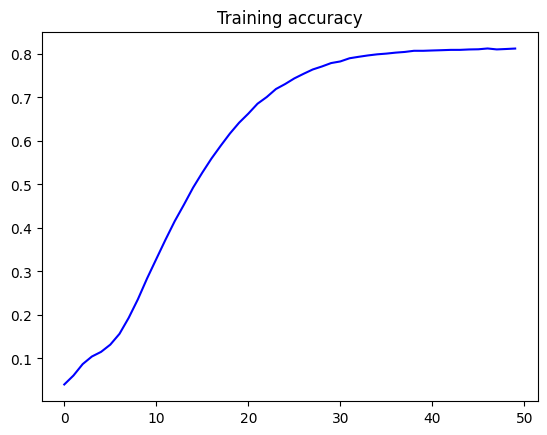

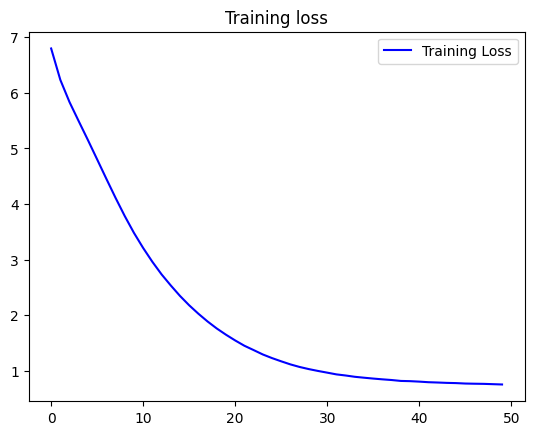

In [ ]:
# Take a look at the training curves of the emodel

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

***finally let's quote (generate🦾) : ***

![Screenshot%202024-02-12%20184205.png](attachment:Screenshot%202024-02-12%20184205.png)

In [ ]:
seed_text = "live with no one "
next_words = 10   # num of words to generate

for _ in range(next_words):
    # Converting the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_len_seq -1, padding='pre')
    # Getting the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choosing the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Getting the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Appending to the current text
    seed_text += " " + output_word

print(seed_text)

live with no one  presence this is more behind he were mew'd up clothe


![Screenshot%202024-01-17%20063135.png](attachment:Screenshot%202024-01-17%20063135.png)